In [262]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [263]:
df1 = pd.read_json('logins.json')
pd.set_option('display.max_rows', None)

In [264]:
df1.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [265]:
df1.shape

(93142, 1)

In [266]:
df1.dtypes

login_time    datetime64[ns]
dtype: object

In [267]:
df1.login_time = pd.to_datetime(df1.login_time)

In [268]:
pd.Index(df1.login_time).is_monotonic_increasing

False

<b>Issue1: login_time Year starts from 1970 in original data</b>
<br><b>Issue2: login_time is not sorted in ascending order in original data</b>

In [269]:
df1 = df1.sort_values('login_time', ascending=True)

In [270]:
df1.head(10)

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
5,1970-01-01 20:21:41
10,1970-01-01 20:26:05
4,1970-01-01 20:26:21
11,1970-01-01 20:31:03
12,1970-01-01 20:34:46


In [271]:
# make sure date is all sorted in ascending order
pd.Index(df1.login_time).is_monotonic_increasing

True

In [272]:
# create a new column 'count' in df1 and assing value 1 to it
df1['count']=1

In [273]:
df1.head(20)

,login_time,count
6,1970-01-01 20:12:16,1
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
2,1970-01-01 20:16:37,1
5,1970-01-01 20:21:41,1
10,1970-01-01 20:26:05,1
4,1970-01-01 20:26:21,1
11,1970-01-01 20:31:03,1
12,1970-01-01 20:34:46,1


In [274]:
df1= df1.set_index('login_time')

In [275]:
df1_15t = pd.DataFrame(df1.resample('15T')['count'].sum())

In [276]:
df1_15t.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


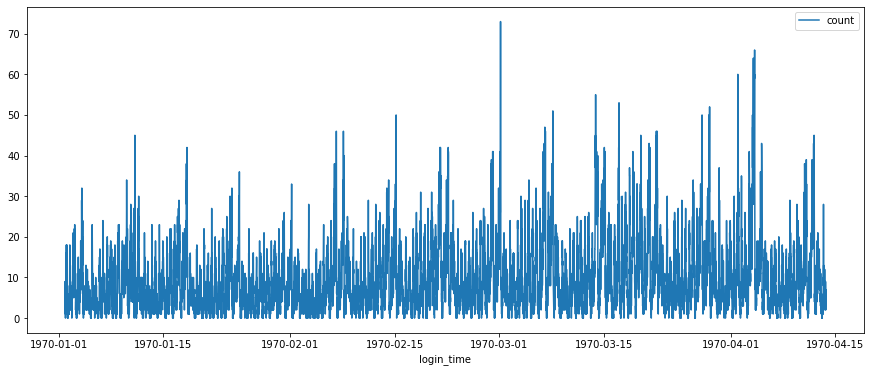

In [277]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=df1_15t)
plt.show()

In [278]:
df1_h = pd.DataFrame(df1.resample('H')['count'].sum())

In [279]:
df1_h['hourOfday'] = df1_h.index.hour

In [280]:
df1_h.head(5)

,count,hourOfday
login_time,,
1970-01-01 20:00:00,24,20
1970-01-01 21:00:00,9,21
1970-01-01 22:00:00,21,22
1970-01-01 23:00:00,58,23
1970-01-02 00:00:00,53,0


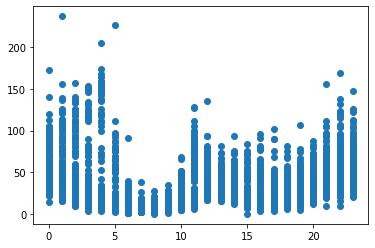

In [296]:
plt.scatter(df1_h.hourOfday, df1_h['count'])

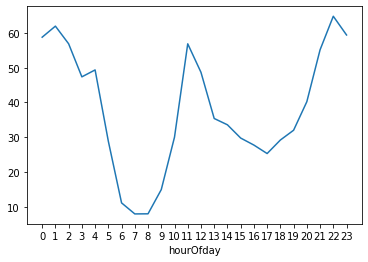

In [299]:
df1_h.groupby('hourOfday')['count'].mean().plot()
plt.xticks(np.arange(0,24,1))
plt.show()

we can see the hourly login drops after 1am, reaches a minimum around 6am, start increasing from 7am~ 11am, drop again during 11am ~ 5pm. 
increase again from 6pm and hit maximum around 10pm. A cyclic behavior with a period of 8 hours. 

In [282]:
df1_D = pd.DataFrame(df1.resample('D')['count'].sum())

In [284]:
df1_D['dayOfweek']= df1_D.index.weekday+1

In [285]:
df1_D.head()

,count,dayOfweek
login_time,,
1970-01-01,112,4
1970-01-02,681,5
1970-01-03,793,6
1970-01-04,788,7
1970-01-05,459,1


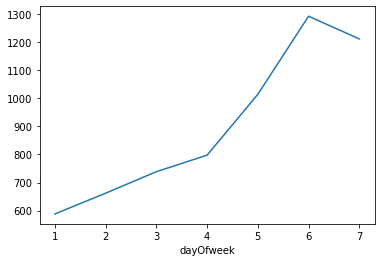

In [287]:
df1_D.groupby('dayOfweek')['count'].mean().plot()
plt.show()

We can see login increase from the Thursday of and hits maximum on Saturday

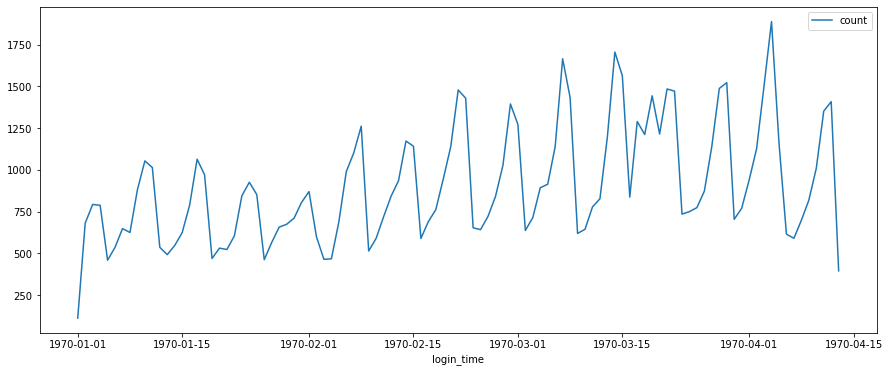

In [167]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=df1_D)
plt.show()

In [250]:
df1_D.head(20)

,count,dayofweek
login_time,,
1970-01-01,112,3
1970-01-02,681,4
1970-01-03,793,5
1970-01-04,788,6
1970-01-05,459,0
1970-01-06,536,1
1970-01-07,648,2
1970-01-08,625,3
1970-01-09,881,4


In [11]:
df2 = pd.read_json('ultimate_data_challenge.json')

In [12]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
